---
title: "Introducción a las Redes de Ordenadores"
subtitle: "Fundamentos de Internet y Arquitecturas de Red"
author:   
  - "Alberto Fernández de Isabel"   
  - "Rubén Rodríguez Fernández (&#64;rrunix)"
date: "10/20/2025"
corresponding: true
css: ojs_interactive.css
aliases:
  - ch1_p1.html

mermaid:
  theme: default
  themeVariables:
    background: "#ffffff"
---

# Introducción

## ¿Qué es Internet?

::: {.columns}
::: {.column width="50%"}
**Etimología**: "Interconnected Networks"

- Red global de redes interconectadas
- Sistema descentralizado
- Múltiples capas jerárquicas
:::

::: {.column width="50%"}
**Características principales**:

- Arquitectura distribuida
- Resiliencia a fallos
- Escalabilidad natural
- Sin control centralizado
:::
:::

```{mermaid}
graph LR
    G1["🌐 Google A"]
    F1["📘 Facebook"]
    G2["🌐 Google B"]
    A1["🛒 Amazon"]
    N1["📺 Netflix"]
    U1["👤 Usuario"]
    
    %% Conexiones normales
    G1 ---|"✅"| F1
    F1 ---|"✅"| G2
    G1 ---|"✅"| A1
    A1 ---|"✅"| N1
    N1 ---|"✅"| G2
    U1 ---|"✅"| G1
    
    %% Conexiones rotas
    G2 -.-|"❌ ROTO"| U1
    A1 -.-|"❌ ROTO"| F1
    
    %% Rutas alternativas
    U1 ---|"🔄 Alt"| F1
    F1 ---|"🔄 Alt"| N1
    N1 ---|"🔄 Alt"| G2
    
    classDef server fill:#4ecdc4,stroke:#00b894,stroke-width:2px,color:#fff
    classDef user fill:#fd79a8,stroke:#e84393,stroke-width:2px,color:#fff
    
    class G1,F1,G2,A1,N1 server
    class U1 user
```

## Jerarquía de Redes

```{mermaid}
%%| fig-width: 5s
graph LR
    PAN["📱 PAN (Personal Area Network)<br>Smartphone ↔ Smartwatch"]
    LAN["🏠 LAN (Local Area Network)<br>Home/Office/Building Network"]
    WLAN["📡 WLAN (Wireless LAN)<br>Wi-Fi Implementation of LAN"]
    CAN["🏫 CAN (Campus Area Network)<br>Multiple LANs in Campus"]
    MAN_ISP["🏙️ MAN (Metropolitan Area Network)<br>ISP Network"]
    MAN_MOBILE["📶 MAN (Metropolitan Area Network)<br>5G/4G Mobile Network"]
    WAN["🌍 WAN (Wide Area Network)<br>Between Cities or Countries"]
    INTERNET["🌐 Internet<br>Global Interconnected WANs"]
    VPN["🔐 VPN (Virtual Private Network)<br>Secure Tunnel over Internet"]
    
    %% Traditional wired path
    PAN --> LAN
    WLAN -.-> LAN
    LAN -->|Multiple LANs| CAN
    CAN --> MAN_ISP
    LAN -->|Multiple LANs| MAN_ISP
    
    %% Mobile path
    PAN --> MAN_MOBILE
    
    %% Both MANs connect to WAN
    MAN_ISP -->|Multiple MANs| WAN
    MAN_MOBILE -->|Multiple MANs| WAN
    WAN -->|Multiple WANs| INTERNET
    VPN --> INTERNET
    
    style WLAN fill:#e1f5fe
    style VPN fill:#f3e5f5
    style MAN_MOBILE fill:#fff3e0
```

- **PAN**: Red personal entre dispositivos cercanos.
- **LAN**: Red local de casa/oficina/edificio.
- **WLAN**: LAN inalámbrica (Wi-Fi).
- **CAN**: Red de campus - conecta múltiples LANs.
- **MAN**: Red metropolitana - cubre una ciudad, incluye redes de ISP y móviles (4G/5G)
- **WAN**: Red de área amplia - conecta ciudades o países.
- **Internet**: Red global - interconexión de todas las WANs del mundo




::: {.notes}
- PAN: Personal (smartwatch, móvil)
- LAN: Local (hogar, oficina)
- MAN: Metropolitana (ciudad)
- WAN: Área amplia (países)
- Internet: Red global
:::



## Ejemplo: Mensaje Madrid → Tokio

Smartphone María (WiFI) en Madrid -> Takeshi LAN en la Universidad de Tokyo

::: {.incremental}
1. **Origen LAN Madrid**: Smartphone → Router WiFi
2. **Router local → MAN**: ISP local → MAN Madrid
3. **MAN → WAN nacional**: MAN Madrid → WAN España
4. **WAN → Internet global**: España → Backbone internacional
5. **Llegada a Japón**: WAN Japón → MAN Tokio
6. **MAN → CAN**: MAN Tokio → Universidad
7. **CAN → LAN**: Campus → LAN específica
8. **Destino final**: LAN → Dispositivo de Takeshi
:::

## Un caso un poco más real

- Probad a ejecutar en vuestras terminales `traceroute www.google.es` (`tracert www.google.es` en Windows)
- ¿Qué información estáis obteniendo?
- Comparadla con vuestros compañer\@s. ¿Es la misma?


## Internet simplificado
::: {style="width: 35vw; height: auto; overflow: visible; text-align: center;"}
![](resources/small_network.png){style="display: block; margin: 0 auto;"}
:::

## Componentes Clave

::: {.columns}
::: {.column width="50%"}
### Router

- Conecta **diferentes redes**
- Usa direcciones **IP**
- Enrutamiento "hop by hop"
- Opera entre redes distantes
:::

::: {.column width="50%"}
### Switch

- Conecta dispositivos en **misma red**
- Usa direcciones **MAC**
- Entrega local inteligente
- Opera dentro de la LAN
:::
:::

## En nuestras casas

Entonces... ¿Esto que es?

![](resources/router_switch.png)

## Identificadores en Red

::: {.columns}
::: {.column width="33%"}
### Dirección IP

- "Dirección postal"
- Localiza en la red
- Ejemplo: 192.168.1.100
- Puede cambiar
:::

::: {.column width="33%"}
### Dirección MAC

- "DNI del dispositivo"
- Única y permanente
- Asignada por fabricante
- No cambia nunca
:::

::: {.column width="33%"}
### Protocolo ARP

- "Directorio telefónico"
- Traduce IP ↔ MAC
- Permite entrega final
- Opera localmente
:::
:::

::: {.callout-note}
# Ejercicio
Prueba a ejecutar `ifconfig` en tu terminal MacOS/Linux o `ipconfig` en Windows. ¿Qué ves?.
:::


## Protocolos de Red

> **Protocolo**: Serie de pasos bien definidos que especifican cómo intercambiar información entre dispositivos

### Analogía del tráfico urbano
- **Sin protocolos**: Caos total, pérdida de información
- **Con protocolos**: Flujo ordenado, comunicación efectiva


# Historia de Internet

## Linea temporal de Internet.
```{mermaid}
%%| fig-width: 6s
timeline
    title Evolución de Internet: De ARPANET a la Era Digital
    
    section Era ARPANET (1969-1983)
        1969 : Nace ARPANET
             : 4 nodos iniciales (UCLA, Stanford, UC Santa Bárbara, Utah)
             : Implementación de conmutación de paquetes
        
        1973 : Primera conexión internacional
        
        1983 : Adopción oficial de TCP/IP
             : División de ARPANET (creación de MILNET)
             : Nace el término "Internet"

    section Nacimiento de la Web (1989-1995)
        1989-1990 : Tim Berners-Lee inventa la World Wide Web
                  : Desarrollo de HTTP, HTML y URLs
        
        1991 : Primer sitio web público

    section Era Comercial (1995-2000)
        1995 : Eliminación de restricciones comerciales
             : Primeros ISPs comerciales (AOL)
             : Aparecen Amazon y eBay
        
        1998 : Fundación de Google
        
        2000-2001 : Explosión de la burbuja punto-com

    section Web 2.0 y Redes Sociales (2003-2010)
        2003-2006 : Redes sociales
        2007 : Lanzamiento del iPhone

    section Era Moderna (2010-2025)
        2010s : Computación en la nube, Internet de las cosas
        
        2020s : Inteligencia Artificial
              : Tecnología 5G

```

- ARPANET se creo con fines militares
- Se creo y publicó el primer sitio web (CERN)
- Burbuja punto com
- Creación de las Redes sociales.
- Inteligencia Artificial Generativa.


## Crecimiento Exponencial

De ~4 dispositivos (1969) a >100.000 millones (2025) en 50 años.


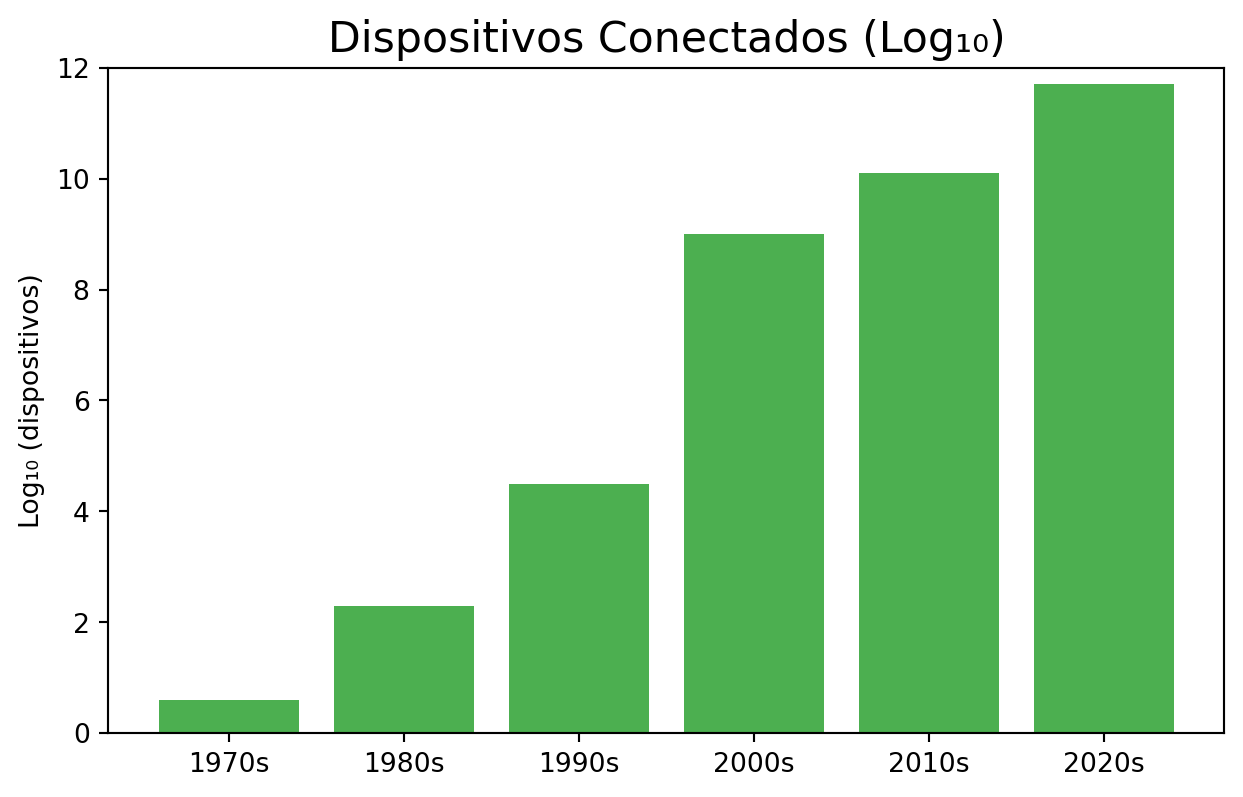

In [1]:
import matplotlib.pyplot as plt

decades = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
values = [0.6, 2.3, 4.5, 9.0, 10.1, 11.7]

plt.figure(figsize=(7.5, 4.5))
plt.bar(decades, values, color='#4CAF50')
plt.title('Dispositivos Conectados (Log₁₀)', fontsize=16)
plt.ylabel('Log₁₀ (dispositivos)')
plt.ylim(0, 12)
plt.show()

# Infraestructura de Red



## Sistemas Terminales (End Systems)

> Hosts (End systems): Son los dispositivos que **usan** Internet como PCs, smartphones, IoT, servidores. Ejecutan aplicaciones de red.



::: {.columns}
::: {.column width="50%"}
### Clasificación

- **Clientes**: Solicitan servicios
- **Servidores**: Proporcionan servicios
- Roles dinámicos (P2P)
:::

::: {.column width="50%"}

::: {.rows}
::: {.rows height="50%"}
```{mermaid}
---
title: Cliente - Servidor 
---
graph TD
    S["🖥️ Servidor<br/>Centralizado"]
    C1["💻 Cliente 1"]
    C2["📱 Cliente 2"]
    C3["🖥️ Cliente 3"]
    
    C1 <--> S
    C2 <--> S
    C3 <--> S
    
    classDef server fill:#ff6b6b,stroke:#d63031,stroke-width:3px,color:#fff
    classDef client fill:#74b9ff,stroke:#0984e3,stroke-width:2px,color:#fff
    
    class S server
    class C1,C2,C3 client
```
:::
::: {.rows height="50%"}
```{mermaid}
---
title: Peer to peer 
---
graph LR
    P1["💻 Peer 1"]
    P2["📱 Peer 2"]
    P3["🖥️ Peer 3"]
    P4["💻 Peer 4"]
    
    P1 <--> P2
    P1 <--> P3
    P2 <--> P3
    P2 <--> P4
    P3 <--> P4
    
    classDef peer fill:#00b894,stroke:#00a085,stroke-width:2px,color:#fff
    
    class P1,P2,P3,P4 peer
```
:::
:::
:::
:::



## Redes de Acceso

> Redes de acceso: Es la red en la que se conectan los host con el router de borde.

::: {.columns}
::: {.column width="50%"}
**Tecnologías host → router**

- WiFi 6: 200-400 Mb/s
- Ethernet: 10 Gb/s
- 4G LTE: 50/15 Mb/s
- 5G: 300/50 Mb/s
:::

::: {.column width="50%"}
**Características**

- Alcance limitado
- Velocidades variables
- Medios compartidos vs dedicados
:::
:::



## Tecnologías WAN

> Router de borde: Router que conecta la red de acceso con el núcleo de la red.

### Tecnologías comunes:

| Tecnología | Velocidad típica | Estado 2025 |
|------------|------------------|-------------|
| DSL/VDSL | 50/15 Mb/s | En declive |
| Cable HFC | 300/30 Mb/s | Estable |
| FTTH PON | 1000/1000 Mb/s | En expansión |
| FTTH P2P | 10000/10000 Mb/s | Premium |
| Satelital | 100/20 Mb/s | Nicho |



## Núcleo de la Red: ISPs

> ISP (Internet Service Providers): Son los componentes del núcleo de la red y proporcionan interconexión entre diferentes redes.

::: {style="width: 70vw; height: auto; overflow: visible;"}
```{mermaid}
graph LR
    T1A["Tier 1<br/>🌍 Cogent"]
    T1B["Tier 1<br/>🌍 Level 3"]
    
    T2A["Tier 2<br/>🇪🇸 Movistar"]
    T2B["Tier 2<br/>🇪🇸 Vodafone"]
    
    T3A["Tier 3<br/>🏠 Lowi"]
    T3B["Tier 3<br/>🏠 Pepephone"]
    
    
    %% Tier 1 peering
    T1A <-.->|"Peering Gratuito"| T1B
    
    %% Tier 2 comprando de Tier 1
    T1A -->|"Tránsito (€€€)"| T2A
    T1B -->|"Tránsito (€€€)"| T2B
    
    %% Tier 3 comprando de Tier 2
    T2A -->|"Tránsito (€€)"| T3A
    T2B -->|"Tránsito (€€)"| T3B

    T2A  <-.->|"Peering Gratuito"| T2B
    
    %% Styling
    classDef tier1 fill:#ff6b6b,stroke:#d63031,stroke-width:3px,color:#fff
    classDef tier2 fill:#4ecdc4,stroke:#00b894,stroke-width:2px,color:#fff
    classDef tier3 fill:#fdcb6e,stroke:#e17055,stroke-width:2px,color:#2d3436
    classDef users fill:#a29bfe,stroke:#6c5ce7,stroke-width:2px,color:#fff
    
    class T1A,T1B tier1
    class T2A,T2B tier2
    class T3A,T3B tier3
    class U1,U2 users
```
:::

::: {.columns}
::: {.column width="33%"}
### Tier 1

- Cobertura global
- Peering gratuito
- AT&T, Telefónica
- 10-100 Gb/s
:::

::: {.column width="33%"}
### Tier 2

- Cobertura regional/nacional
- Pagan tránsito a Tier 1
- Peering selectivo
:::

::: {.column width="33%"}
### Tier 3

- Acceso local
- Última milla
- Usuarios finales
- Sin peering
:::
:::


# Modelos de Referencia

## Arquitecturas por Capas

::: {.columns}
::: {.column width="50%"}
- Cada capa = responsabilidad específica
- Servicios a capa superior
- Usa servicios de capa inferior
- Desarrollo independiente
:::
::: {.column width="50%"}

::: {style="width: 15vw; text-align: center; margin: 0 auto;"}
```{mermaid}
graph TD
    C1["🌐 Capa 1<br/>Frontend<br/><small>Javascript, HTML, CSS</small>"]
    C2["⚡ Capa 2<br/>API/Backend<br/><small>Node.js, Express</small>"]
    C3["💾 Capa 3<br/>Base de Datos<br/><small>MongoDB, PostgreSQL</small>"]
    
    C1 <--> C2
    C2 <--> C3
    
    classDef frontend fill:#e3f2fd,stroke:#1976d2,stroke-width:2px
    classDef backend fill:#fff3e0,stroke:#f57c00,stroke-width:2px
    classDef database fill:#e8f5e8,stroke:#388e3c,stroke-width:2px
    
    class C1 frontend
    class C2 backend
    class C3 database
```
:::
:::
:::

## Encapsulación

::: {.columns}
::: {.column width="35%"}
- Cada capa añade headers
- Datos superiores = payload
- No modifica contenido interno

:::
::: {.column width="65%"}

```{mermaid}
graph TD
    subgraph L1 ["⚡ Capa 1: Enlace - Header Ethernet"]
        subgraph L2 ["🌐 Capa 2: Red - Header IP"]
            subgraph L3 ["📦 Capa 3: Transporte - Header TCP"]
                subgraph L4 ["📧 Datos Originales"]
                    DATA["Mensaje del usuario"]
                end
            end
        end
    end
    
    classDef datalink fill:#f3e5f5,stroke:#7b1fa2,stroke-width:3px
    classDef network fill:#e3f2fd,stroke:#1976d2,stroke-width:3px
    classDef transport fill:#fff3e0,stroke:#f57c00,stroke-width:3px
    classDef original fill:#e8f5e8,stroke:#388e3c,stroke-width:3px
    
    class L1 datalink
    class L2 network
    class L3 transport
    class L4 original
```
:::
:::

## Encapsulación + Arquitectura por capas

::: {.rows}
::: {.rows height="30%"}
```{mermaid}
---
title: Encapsulación 
---
graph LR
  APP["📧 Email"]
  
  subgraph TCP ["TCP"]
      APP2["📧 Email"]
  end
  
  subgraph IP ["IP"]
      subgraph TCP2 ["TCP"]
          APP3["📧 Email"]
      end
  end
  
  subgraph ETH ["Ethernet"]
      subgraph IP2 ["IP"]
          subgraph TCP3 ["TCP"]
              APP4["📧 Email"]
          end
      end
  end
  
  APP --> TCP
  TCP --> IP
  IP --> ETH
    
  classDef app fill:#e8f5e8,stroke:#388e3c,stroke-width:2px
  classDef transport fill:#fff3e0,stroke:#f57c00,stroke-width:2px
  classDef network fill:#e3f2fd,stroke:#1976d2,stroke-width:2px
  classDef datalink fill:#f3e5f5,stroke:#7b1fa2,stroke-width:2px
  
  class APP,APP2,APP3,APP4,APP5,APP6,APP7,APP8 app
  class TCP,TCP2,TCP3,TCP4,TCP5,TCP6 transport
  class IP,IP2,IP3,IP4 network
  class ETH,ETH2 datalink
```
:::
::: {.rows height="30%"}
```{mermaid}
---
title: Desencapsulación 
---
graph LR
    
    DAPP["📧 Email"]
    
    subgraph DTCP ["TCP"]
        DAPP2["📧 Email"]
    end
    
    subgraph DIP ["IP"]
        subgraph DTCP2 ["TCP"]
            DAPP3["📧 Email"]
        end
    end
    
    subgraph DETH ["Ethernet"]
        subgraph DIP2 ["IP"]
            subgraph DTCP3 ["TCP"]
                DAPP4["📧 Email"]
            end
        end
    end
    
    DTCP --> DAPP
    DIP --> DTCP
    DETH --> DIP
    
    classDef app fill:#e8f5e8,stroke:#388e3c,stroke-width:2px
    classDef transport fill:#fff3e0,stroke:#f57c00,stroke-width:2px
    classDef network fill:#e3f2fd,stroke:#1976d2,stroke-width:2px
    classDef datalink fill:#f3e5f5,stroke:#7b1fa2,stroke-width:2px

    class DAPP,DAPP2,DAPP3,DAPP4,DAPP5,DAPP6,DAPP7,DAPP8 app
    class DTCP,DTCP2,DTCP3,DTCP4,DTCP5,DTCP6 transport
    class DIP,DIP2,DIP3,DIP4 network
    class DETH,DETH2 datalink
```
:::
:::

## Modelos OSI vs TCP/IP

::: {.columns}
::: {.column width="50%"}

::: {style="width: 35vw; height auto; overflow: visible;"}
![](resources/tcp_osi.svg)
:::
:::

::: {.column width="50%"}

- **OSI**: 7 capas, modelo teórico
- **TCP/IP**: 4 capas, usado en Internet
:::
:::

> ⚠️ **Nota**: TCP/IP no es un protocolo, hace referencia a una pila de protocolos. Además, no tiene porque utilizar necesariamente TCP, podría ser UDP.

:::{.notes}
TCP/IP es superior a OSI porque es simple, práctico y probado. Mientras OSI tiene 7 capas teóricas diseñadas en comités académicos, TCP/IP usa solo 4 capas que realmente se necesitan y ha funcionado en Internet durante más de 50 años. TCP/IP es más eficiente (menos overhead), más flexible (se adapta fácilmente), y tiene adopción masiva con ecosistemas completos de hardware y software. OSI llegó tarde al mercado cuando TCP/IP ya dominaba, y sus capas extra (como Sesión y Presentación) añaden complejidad innecesaria para la mayoría de aplicaciones reales. En resumen: OSI es el modelo perfecto para estudiar redes, pero TCP/IP es lo que realmente mueve Internet.

- Rigid Foundation: X11's network-based protocol became unchangeable due to backward compatibility, preventing modern optimizations
- Performance Bottlenecks: Every graphics operation had to go through multiple layers (app → toolkit → X11 → server), creating unnecessary overhead for local applications
- Hardware Evolution Mismatch: When GPUs emerged, X11's software-rendering architecture couldn't efficiently utilize new hardware acceleration
- Extension Hell: Adding modern features required bolt-on extensions (Composite, GLX, XRender) rather than clean integration, creating complexity
- Layer Lock-In: Applications built on X11 assumptions were hard to migrate to better architectures, requiring complete rewrites (hence Wayland's slow adoption)
:::


## Nivel de Aplicación

> Es el nivel en que desarrollamos aplicaciones.

::: {.columns}
::: {.column width="50%"}
### OSI (Capas 7, 6, 5)

- **Aplicación**: HTTP, FTP, DNS
- **Presentación**: Cifrado, compresión
- **Sesión**: Control de diálogos
:::

::: {.column width="50%"}
### TCP/IP

- Una sola capa integrada
- Protocolos: HTTP/HTTPS, SMTP, FTP, DNS
- Más práctico
:::
:::



## Nivel de Transporte

> Gestiona la comunicación extremo a extremo entre aplicaciones.

### Capa 4 (ambos modelos)

::: {.columns}
::: {.column width="50%"}
**TCP**

- Comunicación confiable
- Control de flujo
- Entrega ordenada
- Corrección de errores
:::

::: {.column width="50%"}
**UDP**

- Comunicación rápida
- Sin garantías
- Ideal para tiempo real
- Menor overhead
:::
:::



## Nivel de Red/Internet

> Se encarga de encontrar el mejor camino para enviar datos a través de múltiples redes. En otras palabras, se encarga del **enrutamiento** de paquetes.

### Capa 3 OSI / Capa Internet TCP/IP

**Protocolos**:

- IP: Protocolo principal
- ICMP: Control y errores
- ARP: Resolución de direcciones
- OSPF, BGP: Protocolos de enrutamiento

::: {.callout-note}
# Ejercicio
Prueba a ejecutar `ping www.google.es` en tu terminal. ¿Qué ves?.
:::

## Nivel de Acceso Físico

> Controla cómo los datos se transmiten físicamente a través del medio de comunicación.

::: {.columns}
::: {.column width="50%"}
### OSI (Capas 2 y 1)

- **Enlace**: Control de errores, MAC
- **Física**: Señales, voltajes
:::

::: {.column width="50%"}
### TCP/IP

- Capa de Acceso a Red
- Combina ambas funciones
- Ethernet, WiFi, etc.
:::
:::



# Rendimiento en Redes

## Métricas Principales

::: {.columns}
::: {.column width="50%"}
### Latencia

- Tiempo que tarda un paquete en llegar a su destino.
- "Velocidad del vehículo"
- Medida en ms
:::

::: {.column width="50%"}
### Throughput

- Datos enviados por cantidad de tiempo.
- "Número de carriles"
- Medido en Mb/s o Gb/s
:::
:::

> ⚠️ **Nota**: 1 MB/s = 8 Mb/s


## Throughput vs Bandwidth


::: {.columns}
::: {.column width="50%"}
### Bandwidth

- Capacidad **máxima teórica**
- Límite físico del canal
- Condiciones ideales
:::

::: {.column width="50%"}
### Throughput

- Transferencia **real**
- Limitado por el componente más lento
- Condiciones reales
:::
:::


## Latencia vs Throughput

Comparativa del efecto de la latencia y throughput en el tiempo para enviar una cantidad de datos. 

:::{.ojsinteractive}
:::{.ojscontrols}
```{ojs}
// Sliders agrupados en un formulario
viewof settings = Inputs.form({
  "Tamaño total": Inputs.range([50, 5000], {value: 200, step: 10, label: "Tamaño total"},),
  "Latencia A": Inputs.range([1, 50], {value: 1, step: 0.1, label: "Latencia (A)"}),
  "Throughput A": Inputs.range([1, 50], {value: 10, step: 1, label:"Throughput (A)"}),
  "Latencia B": Inputs.range([1, 50], {value: 2, step: 0.1, label:"Latencia (B)"}),
  "Throughput B": Inputs.range([1, 50], {value: 20, step: 1, label:"Throughput B"})
})

// Extraemos variables del formulario
totalData = settings["Tamaño total"]
latencyA = settings["Latencia A"]
throughputA = settings["Throughput A"]
latencyB = settings["Latencia B"]
throughputB = settings["Throughput B"]
```
:::

:::{.ojsplot}
```{ojs}
// Función progreso
function progress(t, latency, throughput, total) {
  if (t < latency) return 0;
  return Math.min(100, ((t - latency) * throughput / total) * 100);
}

// Reloj animado
time = {
  let t0 = Date.now();
  while (true) {
    yield (Date.now() - t0) / 100; // en decimas de segundo
    await Promises.tick(50);
  }
}

// Tiempo máximo
maxTime = Math.max(latencyA + totalData/throughputA, latencyB + totalData/throughputB)

// Progresos
progA = progress(time % maxTime, latencyA, throughputA, totalData)
progB = progress(time % maxTime, latencyB, throughputB, totalData)

// Gráfico con Plot
Plot.plot({
  y: {domain: [0, 100], label: "% completado"},
  x: {label: "Tiempo (s)"},
  color: {legend: true, domain: ["A", "B"], range: ["blue", "red"]},
  marks: [
    Plot.line(d3.range(0, maxTime, 0.1).map(t => ({t, y: progress(t, latencyA, throughputA, totalData), series: "A"})), {x: "t", y: "y", stroke: "series"}),
    Plot.line(d3.range(0, maxTime, 0.1).map(t => ({t, y: progress(t, latencyB, throughputB, totalData), series: "B"})), {x: "t", y: "y", stroke: "series"}),
    Plot.dot([{t: time % maxTime, y: progA, series: "A"}], {x: "t", y: "y", fill: "series", r: 5}),
    Plot.dot([{t: time % maxTime, y: progB, series: "B"}], {x: "t", y: "y", fill: "series", r: 5})
  ]
})
```
:::
:::



## Componentes de la Latencia

$d_{total} = \textcolor{red}{d_{proc}} + \textcolor{blue}{d_{queue}} + \textcolor{green}{d_{prop}} + \textcolor{orange}{d_{trans}}$

- [dproc]{style="color: red;"}: Procesamiento en router (microsegundos)
- [dqueue]{style="color: blue;"}: Espera en buffer (variable con tráfico)
- [dprop]{style="color: green;"}: Propagación por el medio (d/s)
- [dtrans]{style="color: orange;"}: Transmisión de datos (L/R)


## RTT

> RTT (Round trip time): Tiempo total que tarda un paquete en ir desde el origen hasta el destino y volver de vuelta (ida + vuelta).

- La latencia no tiene porque ser simétrica.
- Generalmente la descarga es más rápida que la subida.
- Por lo tanto, el RTT es un valor muy importante en aplicaciones interactivas.


## Comparación: Fibra vs 5G

| Factor | Fibra Óptica | 5G |
|--------|--------------|-----|
| **Propagación** | 67% velocidad luz | 100% velocidad luz |
| **Procesamiento** | ~0.1ms/salto | ~4ms (estación radio) |
| **Cola** | Baja congestión | Alta congestión |
| **Transmisión** | Hasta 10 Gb/s | < 1 Gb/s |

**Resultado**: Fibra generalmente más rápida y estable



## Jitter: Variabilidad de Latencia

> Jitter: Variación en el tiempo de llegada de los paquetes que causa inconsistencia en la comunicación.

### Ejemplo comparativo

::: {.columns}
::: {.column width="50%"}
**Escenario 1** (Bajo jitter):

- Paquetes: 50, 52, 48, 51 ms
- Promedio: 50.25 ms
- Variación: 1.48 ms ✅
:::

::: {.column width="50%"}
**Escenario 2** (Alto jitter):

- Paquetes: 28, 68, 43, 62 ms
- Promedio: 50.25 ms
- Variación: 15.82 ms ❌
:::
:::

**Impacto**: Voz entrecortada, saltos en video, degradación en juegos

## Requisitos para Videojuegos

### RTT máximo tolerado

| Género | Tolerancia | Ejemplo |
|--------|------------|---------|
| **Fighting** | 16-50ms | Street Fighter |
| **FPS Competitivo** | 20-50ms | Counter-Strike |
| **Racing** | 50-100ms | Gran Turismo |
| **RTS** | 100-200ms | StarCraft |
| **MMORPG** | Variable | World of Warcraft |
| **Turn-based** | 500ms+ | Civilization |



## Pérdida de Paquetes

### Causas principales

- **Congestión**: Buffers llenos en routers
- **Corrupción**: Interferencias electromagnéticas
- **Radiación cósmica**: ~1 error/256MB/día


### Soluciones
- Protocolos de capas superiores (TCP)
- Retransmisión automática
- Códigos de corrección de errores
- Interpolar la información


## Resumen
::: {.incremental}
- Internet es un **sistema distribuido y descentralizado**
- Evolución desde 4 hosts (1969) a >100B dispositivos (2025)
- **Infraestructura jerárquica**: PAN → LAN → MAN → WAN → Internet
- **Modelos de capas**: OSI (teórico) vs TCP/IP (práctico)
- **Rendimiento**: Balance entre latencia y throughput
- **Aplicaciones críticas**: Videojuegos requieren <50ms para competitivo
:::